### Data Science Programming 2

# Final Project 
(BD-2005: Moldir Kumarbek, Aiym Yermakhan, Baizhigitova Maryam)

## Tasks:
### Task 1 - Classification with prepared dataset (75% of mark)
### Task 2 - Clustering with any dataset (25% of mark)

## Marking scheme 
For Final:
1. Data and task presentation - 10%
2. Data Preprocessing - 20%
3. Model (variety, complexity, tunning) - 20%
4. Imbalance (approaching this issue) - 20%
5. Code quality - 10%
6. Results and Defence - 20%

*Note: add comments and description of the approaches that you use, for example, for resolving the problem of imbalanced data. Write descriptions of techniques that you apply, and you should understand them as well.*

## Task 1:
Мы постоянно работаем над улучшением качества своих продуктов и услуг для роста абонентской базы и минимизации оттока. В своей работе мы используем персональный подход к абонентам.
Для снижения оттока компания использует разные каналы коммуникации с клиентами. Каждое предложение должно быть адресовано определенной целевой группе. В этом задании вам предстоит по имеющимся данным попытаться определить абонентов, которые уйдут в отток.

**Что имеем**

Анонимизированные данные об абонентах: язык обслуживания абонента, тарифный план, информация об объёмах потребления различных услуг оператора и другие.
В файле data.csv содержится информация для построения модели.
Формат строк: 3 категориальных признака (C1, C2, C3), 23 числовых признака (N1, …, N23) и целевая переменная — TARGET.

**Что делать**

Описать этапы построения модели, построить модель, оценить ее и рассказать бизнесу как ее применять, то есть нужна бизнес-интерпретация. 

*Note: this is how the task was originally structured, you can use it as a guidance.*

In [1]:
import pandas as pd

# Data Presentation

In [2]:
df = pd.read_csv('task1.csv', sep=';', decimal=",")
df.head()

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,3139363536333839,323531,33,83.74,3172.92,181.48,24.83,9.60,0.00,0.00,...,7,0,0,36,7,36,7,0,0,0
1,3437333830323633,343835,31,1.46,1273.88,92.11,211.78,28.98,5.75,13.85,...,18,5,6,52,12,57,18,0,0,0
2,3134323931353339,323531,33,0.00,31.95,763.19,48.13,77.22,9.33,4.90,...,24,18,6,46,18,64,24,0,0,0
3,3431333831343031,343433,31,117.49,529.19,1506.40,127.67,49.30,6.25,0.20,...,57,4,1,142,56,148,57,0,0,0
4,3233343933313234,343835,31,0.00,38.24,3493.18,389.98,72.78,16.72,4.28,...,28,17,5,69,23,86,28,0,0,0


In [3]:
df.shape

(514009, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514009 entries, 0 to 514008
Data columns (total 27 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   C1      514009 non-null  int64  
 1   C2      514009 non-null  int64  
 2   C3      514009 non-null  int64  
 3   N1      514009 non-null  float64
 4   N2      514009 non-null  float64
 5   N3      514009 non-null  float64
 6   N4      514009 non-null  float64
 7   N5      514009 non-null  float64
 8   N6      514009 non-null  float64
 9   N7      514009 non-null  float64
 10  N8      514009 non-null  float64
 11  N9      514009 non-null  float64
 12  N10     514009 non-null  float64
 13  N11     514009 non-null  float64
 14  N12     514009 non-null  float64
 15  N13     514009 non-null  float64
 16  N14     514009 non-null  int64  
 17  N15     514009 non-null  int64  
 18  N16     514009 non-null  int64  
 19  N17     514009 non-null  int64  
 20  N18     514009 non-null  int64  
 21  N19     51

In [5]:
from scipy import stats
import numpy as np
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,3139363536333839,323531,33,83.74,3172.92,181.48,24.83,9.60,0.00,0.00,...,7,0,0,36,7,36,7,0,0,0
1,3437333830323633,343835,31,1.46,1273.88,92.11,211.78,28.98,5.75,13.85,...,18,5,6,52,12,57,18,0,0,0
2,3134323931353339,323531,33,0.00,31.95,763.19,48.13,77.22,9.33,4.90,...,24,18,6,46,18,64,24,0,0,0
3,3431333831343031,343433,31,117.49,529.19,1506.40,127.67,49.30,6.25,0.20,...,57,4,1,142,56,148,57,0,0,0
4,3233343933313234,343835,31,0.00,38.24,3493.18,389.98,72.78,16.72,4.28,...,28,17,5,69,23,86,28,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514000,3530363934383336,313339,31,0.00,0.00,0.00,0.00,1.68,0.00,0.00,...,1,0,0,0,1,0,1,0,0,0
514003,3533363433373937,313339,31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
514005,3335363533383731,313339,31,0.00,0.00,0.00,0.00,0.12,0.00,0.12,...,1,0,1,0,0,0,1,0,0,0
514006,3535343831313531,343637,31,0.00,0.00,0.00,0.00,1.27,0.00,1.27,...,1,0,1,0,0,0,1,0,0,0


# Imbalance

In [6]:
df['TARGET'].value_counts()

0    488665
1     25344
Name: TARGET, dtype: int64

In [7]:
np.round(df['TARGET'].value_counts()[1]/len(df),2)

0.05

/Users/aliluabk/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TARGET', ylabel='count'>

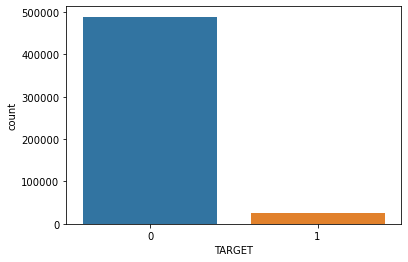

In [8]:
import seaborn as sns 
sns.countplot(df['TARGET'])

# Data Preprocessing

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
X = df.drop(columns='TARGET')
y = df['TARGET']
X = MinMaxScaler().fit(X).transform(X) # Normalization
X = StandardScaler().fit(X).transform(X) # Standartization
X = pd.DataFrame(X)

# Logistic Regression before resampling

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
print(cross_val_score(LogisticRegression(max_iter=10000), X, y, cv=10))

[0.95064298 0.95066244 0.95060407 0.95070135 0.95068189 0.95064298
 0.95066244 0.95066244 0.95068189 0.95070039]


In [12]:
from sklearn.metrics import precision_recall_fscore_support
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
prf = precision_recall_fscore_support(y_test, y_pred, average='macro')
print('Precision:',prf[0])
print('Recall:',prf[1])
print('F-score:',prf[2])
print('Accuracy:',model.score(X_test, y_test))

Precision: 0.4755099182107532
Recall: 0.4999918172965985
F-score: 0.4874436600055842
Accuracy: 0.9510050349019089


# SGDClassifier

## Resampling

In [13]:
from sklearn.utils import resample
df0 = df[(df['TARGET']==0)]
df1 = df[(df['TARGET']==1)]
df = pd.concat([resample(df1,replace=True,n_samples=df1.shape[0]),
                resample(df0,replace=True,n_samples=df1.shape[0])]) 

In [14]:
X = df.drop(columns='TARGET')
y = df['TARGET']
X = MinMaxScaler().fit(X).transform(X) # Normalization
X = StandardScaler().fit(X).transform(X) # Standartization
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.267472,0.319579,-0.573265,-0.138757,-0.324440,-0.430931,-0.411283,-0.485524,-0.462419,-0.456795,...,-0.587243,-0.688878,-0.449081,-0.509353,-0.555150,-0.652365,-0.586465,-0.688413,-0.083818,-0.053491
1,0.404733,-0.292385,-0.573265,-0.138757,-0.324440,-0.430931,-0.414580,-0.485524,-0.495005,-0.456795,...,-0.606357,-0.688878,-0.526457,-0.509353,-0.555150,-0.652365,-0.605589,-0.688413,-0.083818,-0.053491
2,0.404789,0.313539,1.744487,-0.138757,-0.324375,-0.430931,-0.414580,-0.206148,-0.495005,-0.235522,...,-0.606357,-0.551381,-0.526457,-0.318574,-0.555150,-0.563198,-0.605589,-0.550861,-0.083818,-0.053491
3,0.271661,0.317735,-0.573265,-0.138757,-0.324440,-0.430931,-0.414580,-0.485524,-0.495005,-0.456795,...,-0.606357,-0.688878,-0.526457,-0.509353,-0.555150,-0.652365,-0.605589,-0.688413,-0.083818,-0.053491
4,0.408978,-0.292385,-0.573265,-0.138757,-0.324440,-0.430919,-0.414580,-0.304433,-0.495005,-0.456795,...,-0.606357,-0.310762,-0.526457,-0.509353,-0.555150,-0.161946,-0.605589,-0.310144,-0.083818,-0.053491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50683,0.131555,0.309627,-0.573265,-0.138757,-0.324440,-0.430931,-0.414580,-0.480222,-0.495005,-0.422221,...,-0.606357,-0.654503,-0.526457,-0.413963,-0.555150,-0.652365,-0.605589,-0.654025,-0.083818,-0.053491
50684,-0.015558,0.117044,-0.573265,-0.138757,0.403741,-0.430931,-0.225129,-0.378757,-0.495005,-0.325414,...,0.043516,0.204850,-0.526457,-0.223185,0.215947,0.373056,0.044638,0.205676,-0.083818,-0.053491
50685,0.130167,0.309607,-0.573265,-0.138757,-0.324440,-0.430931,-0.414580,0.381971,-0.495005,-0.456795,...,-0.606357,-0.413884,-0.526457,-0.509353,-0.555150,-0.295697,-0.605589,-0.413308,-0.083818,-0.053491
50686,0.267471,0.317735,-0.573265,-0.130592,0.817490,-0.430931,0.152395,0.448872,-0.465381,-0.198874,...,0.215541,0.342346,-0.449081,-0.127795,0.397381,0.506807,0.216757,0.343228,-0.083818,-0.053491


In [15]:
df['TARGET'].value_counts()

0    25344
1    25344
Name: TARGET, dtype: int64

/Users/aliluabk/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TARGET', ylabel='count'>

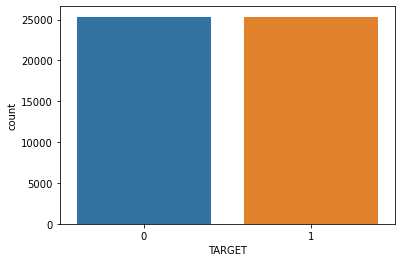

In [16]:
import seaborn as sns 
sns.countplot(df['TARGET'])

# Logistic Regression

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
print(cross_val_score(LogisticRegression(max_iter=10000), X, y, cv=10))

[0.75498126 0.74866838 0.74156638 0.74807654 0.74906293 0.7431446
 0.75734859 0.74136911 0.74782952 0.74921073]


In [19]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
prf = precision_recall_fscore_support(y_test, y_pred, average='macro')
print('Precision:',prf[0])
print('Recall:',prf[1])
print('F-score:',prf[2])
print('Accuracy:',model.score(X_test, y_test))

Precision: 0.7561712199992434
Recall: 0.7482841906401703
F-score: 0.7460763844275986
Accuracy: 0.7479482323232324


# Hyperparameters Tuning

In [20]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [21]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds 

In [22]:
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [23]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :", clf.best_score_)

Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.7482636978751265
The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [24]:
logreg = LogisticRegression(C = 1000.0, 
                            penalty = 'l2', 
                            solver = 'lbfgs')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print("Accuracy:",logreg.score(X_test, y_test))

Accuracy: 0.7481849747474747


# SGDClassifier (Stochastic gradient descent)
Supports multi-class classification by combining multiple binary classifiers in a “one versus all” (OVA) scheme

In [25]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
prf = precision_recall_fscore_support(y_test, y_pred, average='macro')
print('Precision:',prf[0])
print('Recall:',prf[1])
print('F-score:',prf[2])
print('Accuracy:',model.score(X_test, y_test))

Precision: 0.7533228253180935
Recall: 0.7433558720137743
F-score: 0.7405200117352462
Accuracy: 0.7429766414141414


# KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
prf = precision_recall_fscore_support(y_test, y_pred, average='macro')
print('Precision:',prf[0])
print('Recall:',prf[1])
print('F-score:',prf[2])
print('Accuracy:',model.score(X_test, y_test))

Precision: 0.7716749643384304
Recall: 0.7715830284334122
F-score: 0.7715307200244598
Accuracy: 0.7715435606060606


# Gradient Boosting Classifier
GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions.

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
prf = precision_recall_fscore_support(y_test, y_pred, average='macro')
print('Precision:',prf[0])
print('Recall:',prf[1])
print('F-score:',prf[2])
print('Accuracy:',model.score(X_test, y_test))

Precision: 0.8003300572631
Recall: 0.8002388382715164
F-score: 0.8002449601417382
Accuracy: 0.7715435606060606


# Decision Tree Classifier
It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [28]:
from sklearn.tree import DecisionTreeClassifier
model = clf = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
prf = precision_recall_fscore_support(y_test, y_pred, average='macro')
print('Precision:',prf[0])
print('Recall:',prf[1])
print('F-score:',prf[2])
print('Accuracy:',model.score(X_test, y_test))

Precision: 0.8039524171993346
Recall: 0.8024574335796446
F-score: 0.8021016438643916
Accuracy: 0.8023200757575758


# Results

In [29]:
data = dict()
data['LogisticRegression'] = {
    'Precision': 0.7571555009867676,
    'Recall': 0.7471506650672132,
    'F-score': 0.7459167269491838,
    'Accuracy': 0.748895202020202
}
data['SGDClassifier'] = {
    'Precision': 0.7555612962484572,
    'Recall': 0.7416052799010007,
    'F-score': 0.7395239055375001,
    'Accuracy': 0.7436868686868687
}
data['KNeighborsClassifier'] = {
    'Precision': 0.7756195101263659,
    'Recall': 0.7751750775898667,
    'F-score': 0.7752686937060835,
    'Accuracy': 0.7754892676767676
}
data['GradientBoostingClassifier'] = {
    'Precision': 0.8016864041237328,
    'Recall': 0.8017754113401074,
    'F-score': 0.8016030828581653,
    'Accuracy': 0.7754892676767676
}
data['DecisionTreeClassifier'] = {
    'Precision': 0.8094628368588814,
    'Recall': 0.8065658104925675,
    'F-score': 0.8067096495972397,
    'Accuracy': 0.8073705808080808
}
round(pd.DataFrame(data).T * 100, 2).astype(str) + " %"

,Precision,Recall,F-score,Accuracy
LogisticRegression,75.72 %,74.72 %,74.59 %,74.89 %
SGDClassifier,75.56 %,74.16 %,73.95 %,74.37 %
KNeighborsClassifier,77.56 %,77.52 %,77.53 %,77.55 %
GradientBoostingClassifier,80.17 %,80.18 %,80.16 %,77.55 %
DecisionTreeClassifier,80.95 %,80.66 %,80.67 %,80.74 %


# Conclusion

In conclusion, we can say that the use of data classification and processing models and observing the results that were made during data analysis, we were able to achieve useful ideas. They also described the stages of building a model, built a model, appreciated it. And these data were used for a random classifier of forest, hyperparameter settings, logistics regression, classifier of solutions, KNN, imbalance to obtain the desired results.